## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!


### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.


In [4]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [5]:
df_X = diabetes.data
df_y = diabetes.target

### (2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [7]:
import numpy as np

df_X = np.array(df_X)
df_X.shape

### (3) 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [11]:
df_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=123)

print(f"전체 학습 데이터: {df_X.shape} 레이블: {df_y.shape}")
print(f"학습 데이터: {X_train.shape} 레이블: {y_train.shape}")
print(f"테스트 데이터: {X_test.shape} 레이블: {y_test.shape}")

### (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [26]:
W = np.ones(shape=(10,))
b = 0

### (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [85]:
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()

### (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [152]:
def gradient(x, y, y_pred):
    error = y_pred - y
    w_grad = 2 * np.dot(x.T, error) / len(y)
    b_grad = 2 * error.mean()
    return w_grad, b_grad

### (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [153]:
learning_rate = 0.5

### (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


In [154]:
epochs = 10

In [155]:
losses = []
weight_history = []
bias_history = []

In [157]:
for epoch in range(epochs):
    
    # 예측값 계산
    y_pred = np.dot(X_train, W) + b

    # 손실 계산
    l = loss(y_train, y_pred)
    
    # 기울기 계산
    w_grad, b_grad = gradient(X_train, y_train, y_pred)
    l = 0
    
    # 가중치와 편향 업데이트
    W -= learning_rate * w_grad
    b -= learning_rate * b_grad

    print(f'epoch {epoch + 1}, loss: {l}')

    # 손실 및 가중치 저장
    losses.append(l)
    weight_history.append(W.copy())
    bias_history.append(b)

epoch 1, loss: 0
epoch 2, loss: 0
epoch 3, loss: 0
epoch 4, loss: 0
epoch 5, loss: 0
epoch 6, loss: 0
epoch 7, loss: 0
epoch 8, loss: 0
epoch 9, loss: 0
epoch 10, loss: 0


In [158]:
for epoch in range(epochs):

    # 예측값 계산
    y_pred = np.dot(X_train, W) + b

    # 손실 계산
    l = loss(y_train, y_pred)

    # 기울기 계산
    w_grad, b_grad = gradient(X_train, y_train, y_pred)


    # 가중치와 편향 업데이트
    W -= learning_rate * w_grad
    b -= learning_rate * b_grad

    print(f'epoch {epoch + 1}, loss: {l}')


    # 손실 및 가중치 저장
    losses.append(l)
    weight_history.append(W.copy())
    bias_history.append(b)


print("최종 가중치:", W)
print("최종 편향:", b)

epoch 1, loss: 5103.897672263694
epoch 2, loss: 5077.2103121491955
epoch 3, loss: 5050.951888265126
epoch 4, loss: 5025.114791349792
epoch 5, loss: 4999.691551258295
epoch 6, loss: 4974.674834396143
epoch 7, loss: 4950.057441200323
epoch 8, loss: 4925.832303666974
epoch 9, loss: 4901.992482924797
epoch 10, loss: 4878.531166853346
최종 가중치: [ 18.25287577   5.56341593  62.4175868   44.46440065  18.63171347
  15.85459946 -42.27399597  46.3415227   57.42429347  42.67407756]
최종 편향: 152.37294639507755


### (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.


In [166]:
y_pred = np.dot(X_test, W) + b

In [167]:
y_test

array([185., 150., 246., 184., 110., 202., 336.,  69.,  69.,  87.,  66.,
       164., 265., 198., 248., 171., 102., 182., 262., 233., 151., 275.,
       230.,  39.,  42., 122.,  81.,  31., 156., 161.,  80., 215., 310.,
       163., 265.,  84.,  54., 137., 248.,  72., 248.,  59.,  97.,  61.,
        72., 296.,  55.,  75.,  53., 173., 158.,  96., 140., 186.,  93.,
       123., 237., 138., 292.,  78., 182., 127., 321., 109., 212.,  45.,
        96., 109.,  89.,  96.,  60.,  51., 200., 265.,  68.,  91., 172.,
       115., 125.,  53.,  63., 259., 214., 195., 258., 235., 173.,  59.,
       219.])

In [168]:
loss(y_test, y_pred)

5293.843653602478

### (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

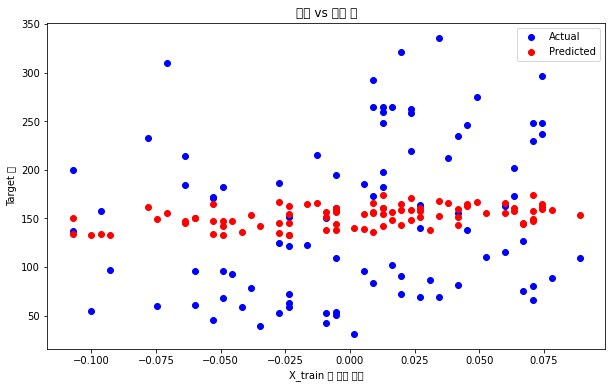

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')

plt.xlabel('X_train 첫 번째 컬럼')
plt.ylabel('Target 값')
plt.title('예측 vs 실제 값')

plt.legend()
plt.show()